#HW 5

In this notebook, I will be using MNIST image data from Sclkit learn and use PCA,t-SNE, K-Means Clustering, and Hierarchal Clustering. 

Read in the data set

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
#See how many images there are in this data set
len(X)

70000

In [4]:
len(y)

70000

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

#1. Use PCA to reduce the dimensionality

I am using PCA for dimensionality reduction because we have as much as 784 pixels, or features in this data set. 784 is perhaps too much and can cause the curse of dimensionality. I will try to reduce the dimensions without getting rid of too much data that it throws off the variance too much. In lecture, Tyler reduced the example data to components that will explain 95% of the data. Let's try that code here to see how many components will explain 95% of the variance. 

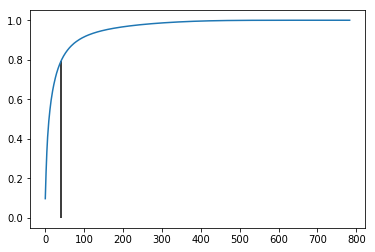

In [7]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[40],x=40)

In [8]:
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

153
0.9503499702078613


In [9]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


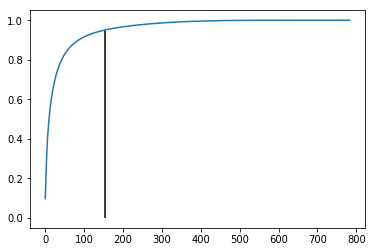

In [10]:
plt.plot(range(len(cum_ratio)), cum_ratio);
plt.vlines(ymin=0,ymax=cum_ratio[154],x=154)

I reduced the number of components from 784 to 154 because that already explains 95% of the variance in this data set. We see the elbow effect is present way before 154 at around 90. 

#b. Plot the first two components. Do you notice any trends? What is this plot showing us?

In [11]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

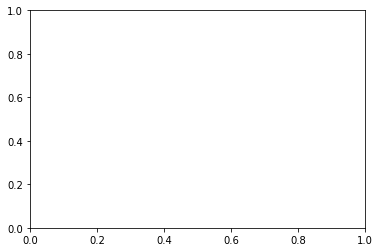

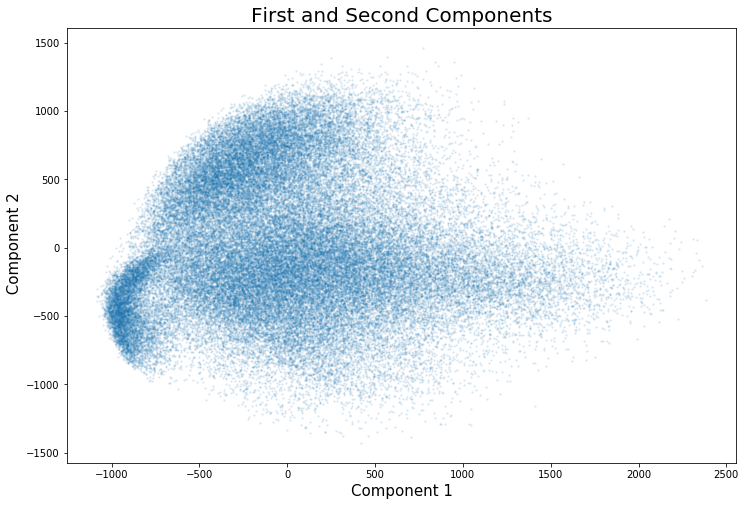

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = X_2dim[:,0]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
x = X_2dim[:,0]
y_graph = X_2dim[:,1]
points = X_2dim[:,2:4]
color = np.sqrt((points**2).sum(axis = 1))/np.sqrt(2.0)
rgb = plt.get_cmap('Blues')(color)
ax.scatter(x, y_graph, s=2, alpha=.1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel(' Component 2', fontsize = 15)
ax.set_title('First and Second Components', fontsize = 20)
plt.show();

This plot shows the two components with the most variances. On the x-axis, we see a trend from left to right with most of the distribution being on the left side. Across the y-axis, the spread is also consistent. This backs up the idea that the first principle component has the most information and also the highest variance. The second principle component will have the second most information and second highest variance. 

#c. Why would you use PCA? What is it doing? And what are the drawbacks?

I would use PCA when I want to reduce the number of variables and also want to make sure that my variables are independent of ont another. The natural drawback is that I lose data, but as long as it still explains the data well, it's worth using PCA. 

#d. Plot some of the images, then compress them using PCA and plot again. How does it look?

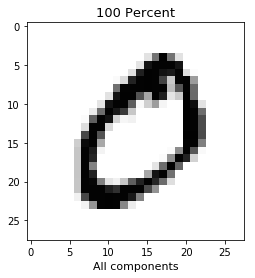

In [13]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')
plt.xlabel('All components', fontsize=11)
plt.title('100 Percent', fontsize = 13);

In [14]:
pca = PCA(n_components=153)
X_153dim = pca.fit_transform(X)

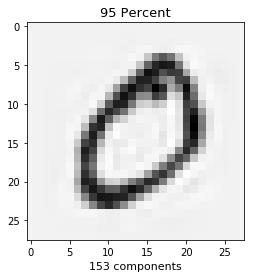

In [15]:
X_inverse = pca.inverse_transform(X_153dim)
plt.imshow(X_inverse[1].reshape((28,28)), cmap='Greys')
plt.xlabel('153 components', fontsize=11)
plt.title('95 Percent', fontsize = 13);

In [16]:
pca = PCA(n_components=30)
X_30dim = pca.fit_transform(X)

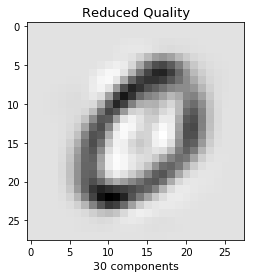

In [17]:
X_inverse = pca.inverse_transform(X_30dim)
plt.imshow(X_inverse[1].reshape((28,28)), cmap='Greys')
plt.xlabel('30 components', fontsize=11)
plt.title('Reduced Quality', fontsize = 13);

#2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points)

I will be using t-SNE to visualize my data set. I'll be sorting them out between 0-9, then group them together. I want to test whether PCA reduced dimensionality but still kept the information enough to make a good prediction. I will be running a PCA to reduce the components to 70, then use visualization with a perplexity of 50, 1000 iterations and a learning rate of 200 to see how they work out. 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 17.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 369.694384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.607780
[t-SNE] KL divergence after 1000 iterations: 1.692052


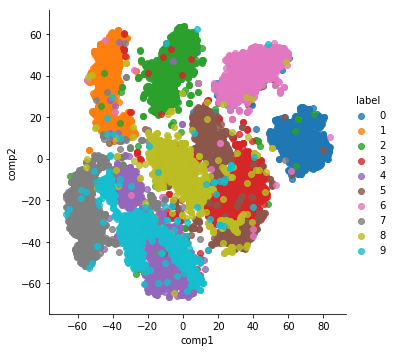

In [18]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

#a. How does this plot differ from your PCA plot?

The t-SNE plot is different from the PCA plot becase this one classifies the different data points by their attributes instead of showing the variation of each component without the label differentiation. 

#b. How robust is it to changes in perplexity?

Compare 50% and 25% perplexity.

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 14.678s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 335.874988
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.545296
[t-SNE] KL divergence after 500 iterations: 2.120546
[t-SNE] Computing 151 n

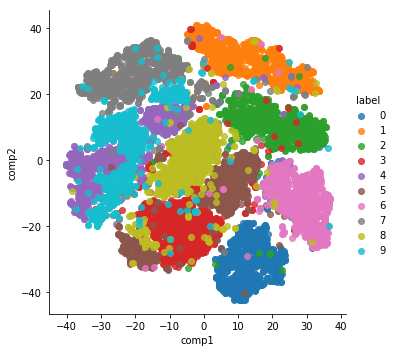

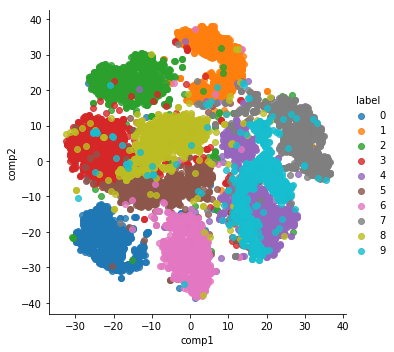

In [19]:
for i in [25, 50]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=500, learning_rate=200)
    tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
    df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
    df_tsne['label'] = y[rows[:n_select]]
    sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

We can see that as perplexity decreases, the the focus becomes less global and the data points become more spread apart. 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.028s...
[t-SNE] Computed neighbors for 10000 samples in 15.545s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 369.694384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.636292
[t-SNE] KL divergence after 500 iterations: 2.136266
[t-SNE] Computing 151 

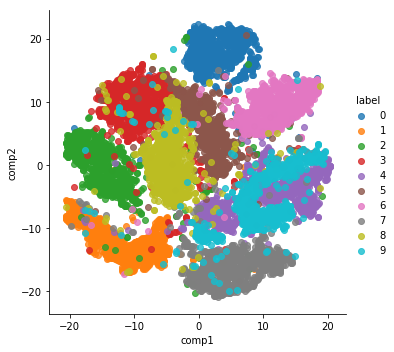

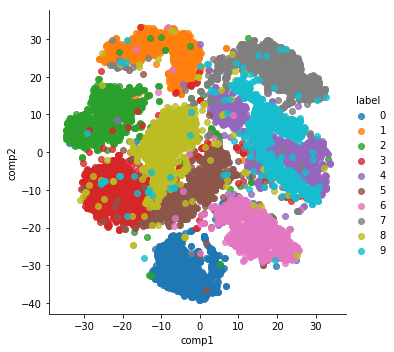

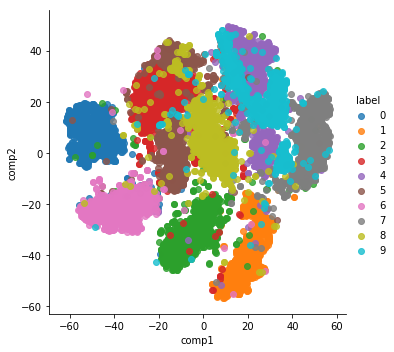

In [20]:
for i in [50, 200, 1000]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500, learning_rate=i)
    tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
    df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
    df_tsne['label'] = y[rows[:n_select]]
    sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

It seems that the difference in learning rate does affect in its clustering. As the learning rate decreases, the shape of the clusters become closer to a ball-looking figure. A higher learning rate branches out the shape of the clusters. 

#c. How robust is it to different learning rate and number of iterations?


Change from 1000 to 500 iterations

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 15.407s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 369.694384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.634720
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317

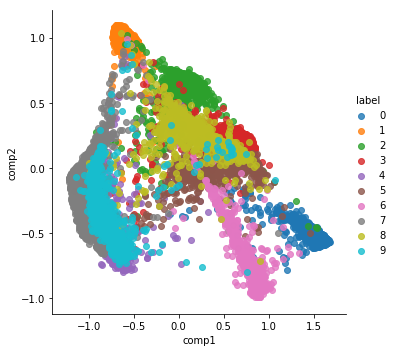

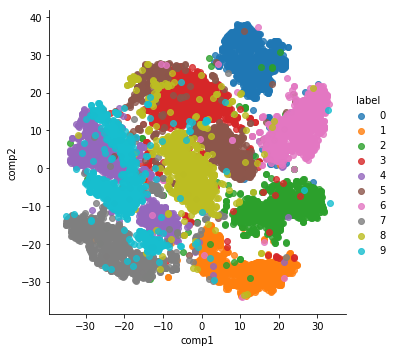

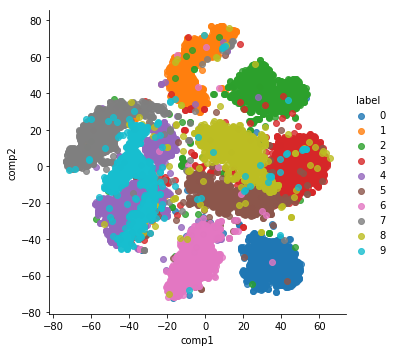

In [21]:
for i in [250, 500, 1000]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=i, learning_rate=200)
    tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
    df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
    df_tsne['label'] = y[rows[:n_select]]
    sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

It looks like the learning rate has a huge effect on how the data points forms clusters. As the learning rate increases, the different data points seem to create a more defined cluster. 

#3. Perform k-means clustering:

#a. How did you choose k?

I will choose 10 to be our parameter. K represents the number of clusters, and we want 10 because we have 10 different labels. 

#b. How did you evaluate your clustering?

I'll be selecting a subset for K-Means because the data set is still large

In [62]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
kmeans_tsne = pd.DataFrame(X_sub_kmeans, columns=['comp1', 'comp2'])
kmeans_tsne['label'] = labels

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(X_scaled)
labels_train = kmeans.labels_

In [63]:
X_scaled = preprocessing.scale(X)
X_sub = shuffle(X_scaled)[0:3000]

pca_X_sub = PCA(n_components=2)
X_sub_kmeans = pca_X_sub.fit_transform(X_sub)

k_means = pd.DataFrame({'comp1':X_sub_kmeans[:,0], 'comp2':X_sub_kmeans[:,1]})

In [64]:
kmeans_model = KMeans(n_clusters=10, n_init=100, n_jobs=-1).fit(X_sub_kmeans)
labels = kmeans_model.labels_
score = round(silhouette_score(k_means[['comp1', 'comp2']], labels, metric='euclidean'),3)
print(score)

0.351


A silhoutte score shows how well each point was classified to its cluster. I think 0.35 is a decent score because the range is between -1 and 1. 

#c. Visualize your clusters using t-sne

In [65]:
kmeans_tsne = pd.DataFrame(X_sub_kmeans, columns=['comp1', 'comp2'])
kmeans_tsne['label'] = labels

AttributeError: 'function' object has no attribute 'axes'

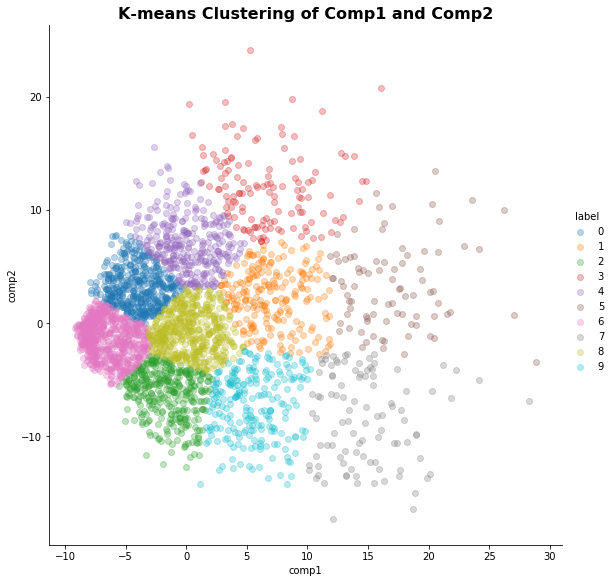

In [66]:
kmeanspolot = sns.lmplot(x='comp1', y='comp2', data=kmeans_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=8)
plt.title('K-means Clustering of Comp1 and Comp2', fontsize=16, fontweight='bold')
axes = kmeansplot.axes
axes[0,0].set_ylim(-25,25)
axes[0,0].set_xlim(-25,25)

#d. Did you scale your data?

Yes, some of the data points got scattered on the right side, but it seems that the other clusters got around together pretty well. 

#e. How robust is your clustering?

I think it's pretty robust as the data points are consistent to their groupings. 

#4. Perform hierarchical clustering

Hierarchal Clustering is  great because we don't need the K value like K-Means. I will choose a 100 data points to start off. 

#a. Plot your dendrogram

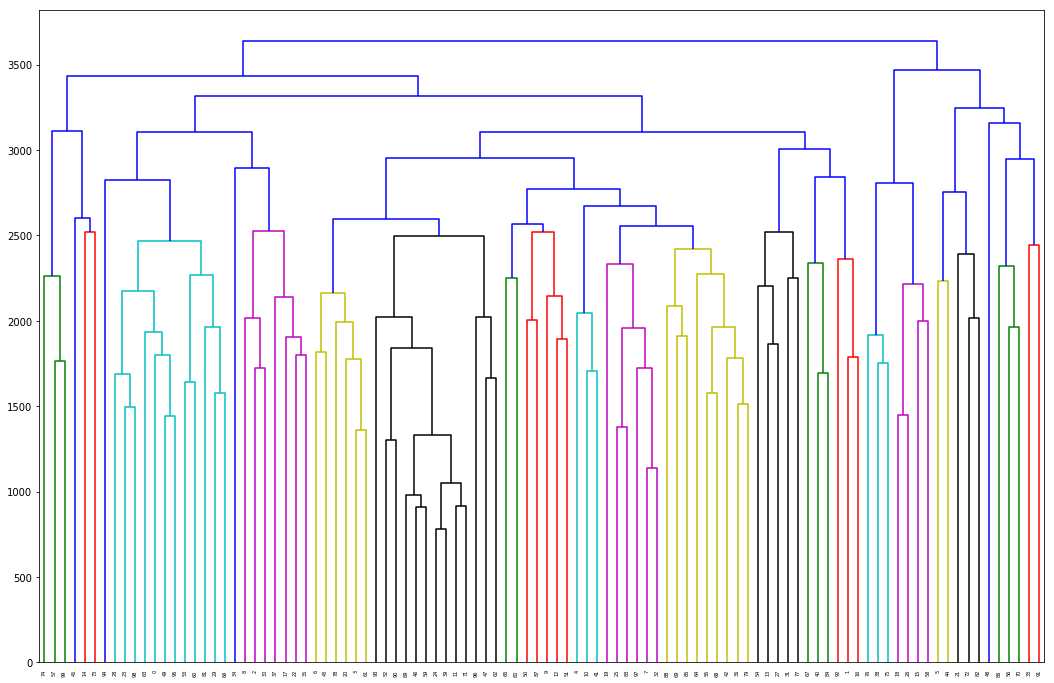

In [67]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 100

Z = linkage(X[rows[:n_select],:], 'complete')
plt.figure(figsize=(18, 12))
_ = dendrogram(Z)

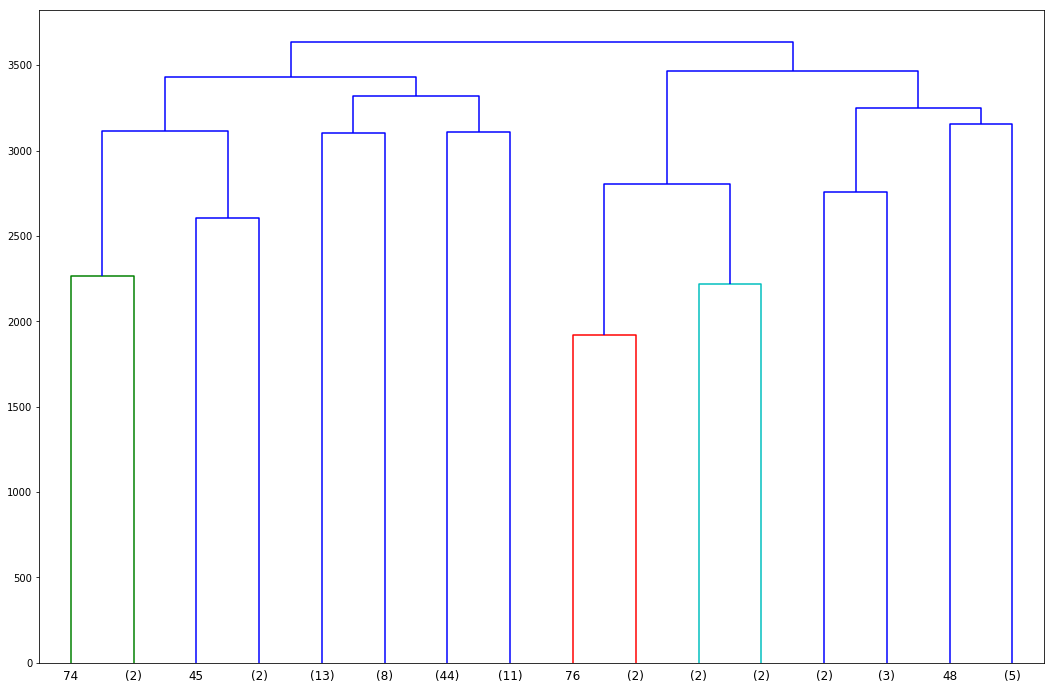

In [68]:
Z = linkage(X[rows[:n_select],:], 'complete')
plt.figure(figsize=(18, 12))
_ = dendrogram(Z, p=3, truncate_mode='level')

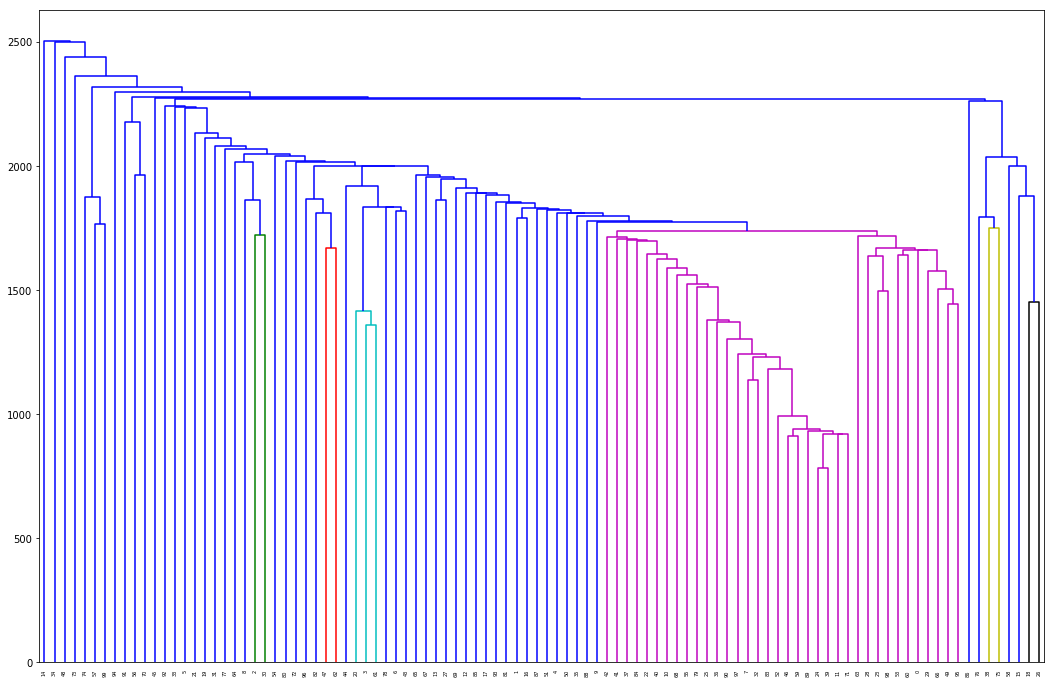

In [69]:
Z = linkage(X[rows[:n_select],:], 'single')
plt.figure(figsize=(18, 12))
_ = dendrogram(Z)

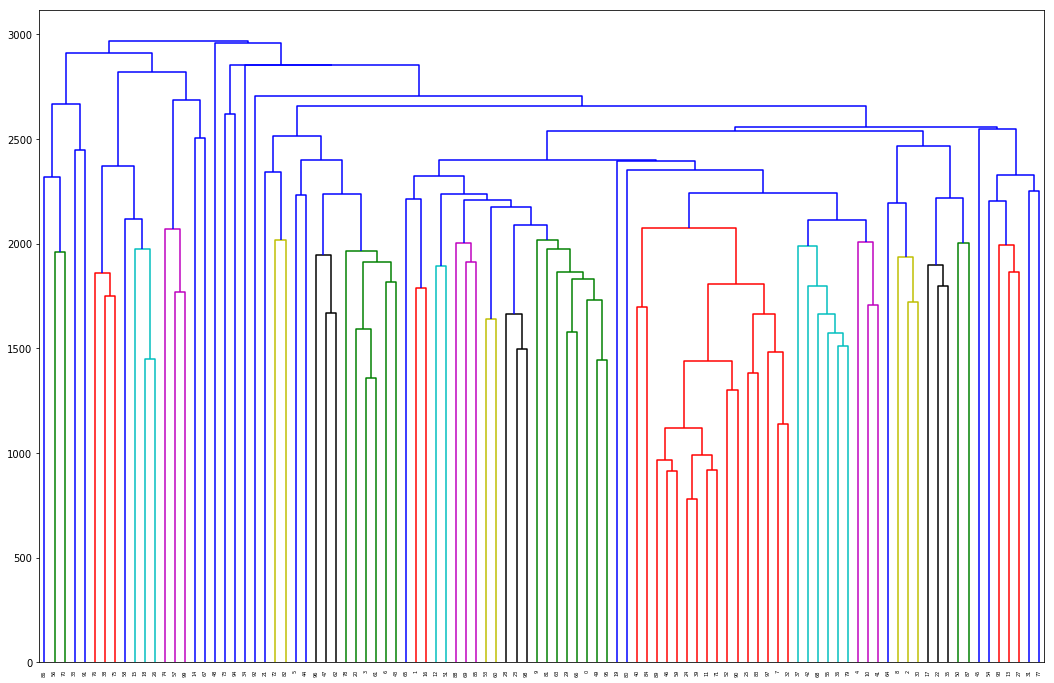

In [70]:
Z = linkage(X[rows[:n_select],:], 'average')
plt.figure(figsize=(18, 12))
_ = dendrogram(Z)

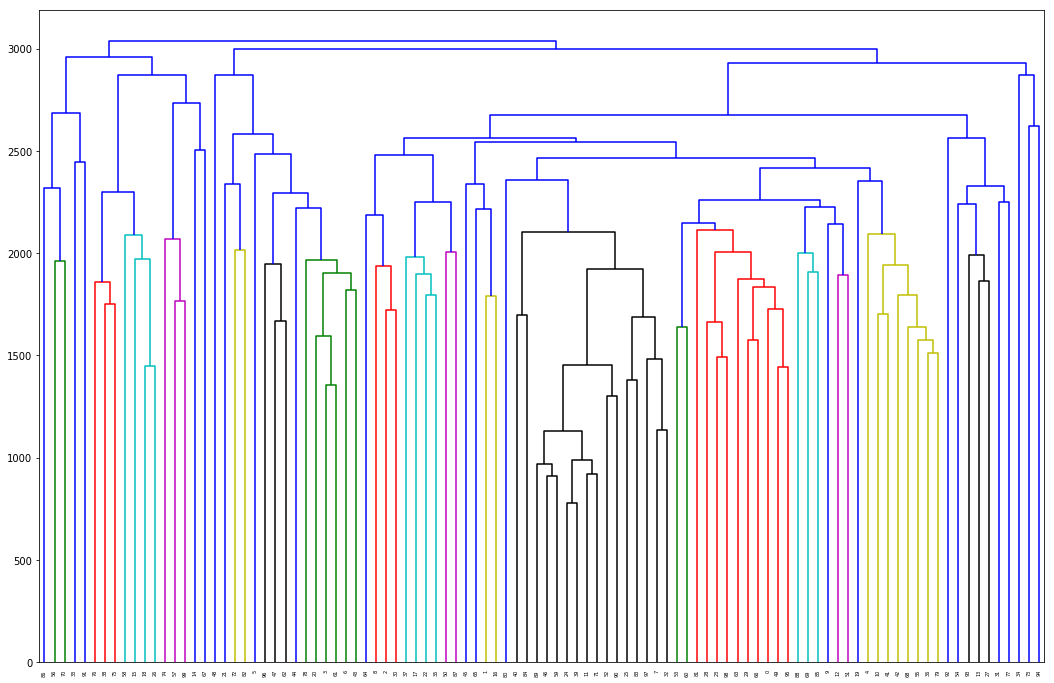

In [71]:
Z = linkage(X[rows[:n_select],:], 'weighted')
plt.figure(figsize=(18, 12))
_ = dendrogram(Z)

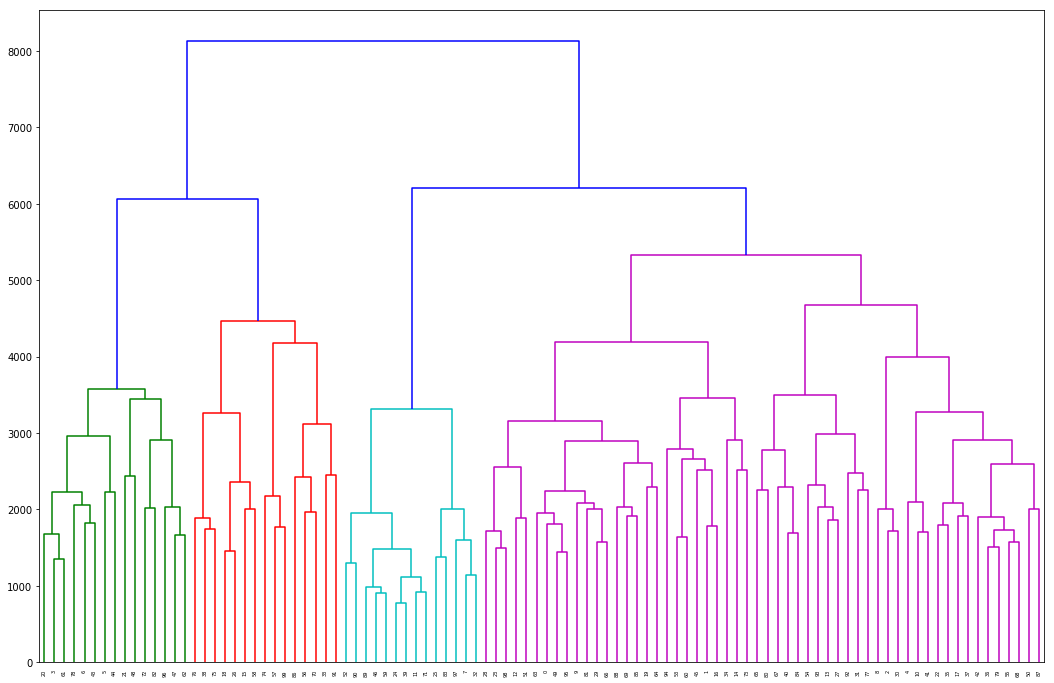

In [72]:
Z = linkage(X[rows[:n_select],:], 'ward')
plt.figure(figsize=(18, 12))
_ = dendrogram(Z)

#b. How many clusters seem reasonable based off your graph?

I'm not quite sure but about 10 clusters seems pretty reasonable. More than 20 or so would be too much for visualization.


#c. How does your dendrogram change with different linkage methods?


Changing up the methodology of linkage changes the structure of the dendogram. The single looks the best with